### เครื่องปรับอากาศ | 9000btu |                                          
##### TYPE 2 " TURN ON EVERYDAY//ONCE TIME


## NO. 1 (เครื่องปรับอากาศ) เวลาเก็บข้อมูล 22:00 - 06:00 **
![image](https://raw.githubusercontent.com/skyfighter/iHEMS/master/Device/pic/air-1.png)

In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()


####### set databases to empty #########
query_empty = """truncate table device.aircont""" 
c.execute(query_empty)
print "device.aircont are Empty!!! \n"

query = "SELECT watt FROM collected_info.1_aircont WHERE no >= '%s'   AND no <= '%s'; "% (0,3276)
df = pd.read_sql(query, conn)
# print df.watt[5]

#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(10, 59)
    duration_min =  random.randint(10, 59)
    duration_hour1 = ['19'] * 5 + ['20'] * 50 + ['21'] * 43 +['22'] * 2     #SET Start 7-10 pm.
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(10,59)
    duration_min =  random.randint(10, 59)
    duration_hour =  random.randint(6, 8)     #SET 6-8 Hours
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item

days = 0
j = 0
i = 0
print "\nDays :",days ,":",time_b[j].strftime('%a')
off_item = rand_turnon()  
no_item = rand_duration()  

while (j <= (5760*d)-1):    
    c.execute("INSERT INTO device.aircont (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
    conn.commit()
    j += 1 
    
    while (off_item+(5760*(days)) <= j <= (no_item+off_item)+(5760*(days))):                   
        c.execute("INSERT INTO device.aircont (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
        conn.commit()
        i += 1 
        j += 1
        if (j == (no_item+off_item)+(5760*(days))):
            days +=1
            print "\nDays :",days ,":",time_b[j].strftime('%a')
            off_item = rand_turnon()  
            no_item = rand_duration() 
            i= 0   
                    
print "DONE!"


device.aircont are Empty!!! 


Days : 0 : Thu
time to turn-on appliacne on 21 : 48 : 51 equal to 5235 items
consuming the appliance 7 hours 45 minutes 30 seconds that equal to 27930 seconds or 1862 items

Days : 1 : Fri
time to turn-on appliacne on 21 : 59 : 21 equal to 5277 items
consuming the appliance 7 hours 28 minutes 31 seconds that equal to 26911 seconds or 1794 items

Days : 2 : Sat
time to turn-on appliacne on 20 : 37 : 22 equal to 4949 items
consuming the appliance 7 hours 39 minutes 36 seconds that equal to 27576 seconds or 1838 items

Days : 3 : Sun
time to turn-on appliacne on 21 : 30 : 45 equal to 5162 items
consuming the appliance 8 hours 37 minutes 25 seconds that equal to 31045 seconds or 2069 items

Days : 4 : Mon
time to turn-on appliacne on 21 : 27 : 19 equal to 5149 items
consuming the appliance 6 hours 46 minutes 14 seconds that equal to 24374 seconds or 1624 items

Days : 5 : Tue
time to turn-on appliacne on 20 : 25 : 20 equal to 4901 items
consuming the applianc

IndexError: index 178560 is out of bounds for axis 0 with size 178560

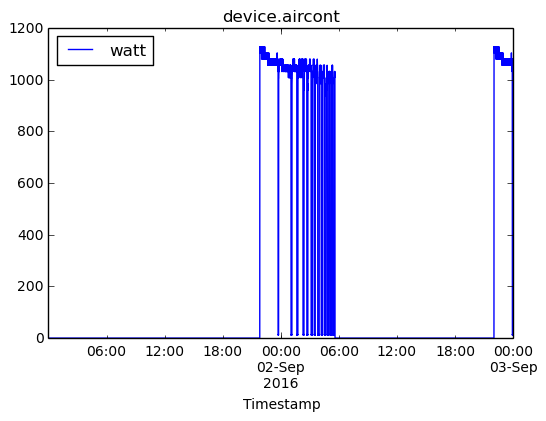

In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[5760*2])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('device.aircont')
df.plot(ax=ax )
plt.show()
